# lab1_2 代码部分


库导入

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pylab as plt
import math

定义插值函数构建

In [2]:
def Linterpolation(ra:np.ndarray,f,x:sp.symbols):
    """
    Linear interpolation.
    :param ra:插值x序列
    :param r:由于是一元表达式，所以只用传入一个一元变量
    :param f:传入函数表达式
    :return:返回一个sympy表达式，后续可以带入实际值运算
    """
    y = 0
    
    n=ra.size
    for k in range(0,n):
        l=1
        for j in range(0,n):
            if j==k:
                continue
            else:
                l=l*(x-ra[j])/(ra[k]-ra[j])
        y=y+l*f(ra[k])
    return sp.simplify(y)


用平均相对误差来评价差值的准确性

可视化

## 问题二

### 拉格朗日插值区间越小越好吗？

(1)定义f1(x)
$$
f(x) =  \frac{1}{1+x^2}   
$$

In [3]:
def f1(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return 1/(1+x**2);

设置变量和验证数据列

In [4]:

evals = np.array([-0.95,-0.5,0.5,0.95])
# result_L=np.zeros(evals.size)
result_R=np.array([i for i in f1(evals)])

根据不同差值次数n得出结果

n= 5
多项式表达式： 1.33226762955019e-15*x**5 + 0.353506787330317*x**4 + 4.44089209850063e-15*x**3 - 0.848416289592761*x**2 + 2.91433543964104e-16*x + 0.994909502262444
x: -0.95 估计值: 0.517147288602936 真实值: 0.5256241787122208 相对误差： 0.0161272834329147
x: -0.5 估计值: 0.804899604072397 真实值: 0.8 相对误差： 0.00612450509049678
x: 0.5 估计值: 0.804899604072399 真实值: 0.8 相对误差： 0.00612450509049858
x: 0.95 估计值: 0.517147288602946 真实值: 0.5256241787122208 相对误差： 0.0161272834328953


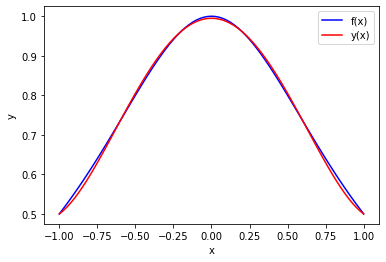

n= 10
多项式表达式： -0.185821481985784*x**10 + 5.6843418860808e-14*x**9 + 0.594628742356576*x**8 - 7.38964445190504e-13*x**7 - 0.898781344070642*x**6 - 5.96855898038484e-13*x**5 + 0.989700078776167*x**4 - 8.17124146124115e-14*x**3 - 0.99972599507549*x**2 - 8.88178419700125e-16*x + 1.0
x: -0.95 估计值: 0.526407983104861 真实值: 0.5256241787122208 相对误差： 0.00149118785699893
x: -0.5 估计值: 0.800022599887398 真实值: 0.8 相对误差： 2.82498592468761e-5
x: 0.5 估计值: 0.800022599887328 真实值: 0.8 相对误差： 2.82498591594460e-5
x: 0.95 估计值: 0.526407983102836 真实值: 0.5256241787122208 相对误差： 0.00149118785314458


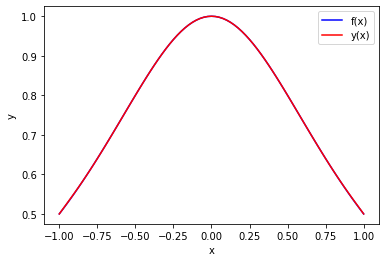

n= 20
多项式表达式： 0.0500694840447977*x**20 + 5.67524693906307e-9*x**19 - 0.242837078869343*x**18 + 1.34343281388283e-7*x**17 + 0.550493447575718*x**16 + 4.83123585581779e-7*x**15 - 0.815560380462557*x**14 - 2.05123797059059e-7*x**13 + 0.950188042013906*x**12 - 6.02216459810734e-7*x**11 - 0.991554210108006*x**10 - 5.41331246495247e-8*x**9 + 0.99915755526672*x**8 + 1.50612322613597e-9*x**7 - 0.999955461609034*x**6 - 2.4056134861894e-10*x**5 + 0.999998971619647*x**4 + 3.12638803734444e-13*x**3 - 0.999999993406618*x**2 + 4.82947015711943e-15*x + 1.0
x: -0.95 估计值: 0.525620859613926 真实值: 0.5256241787122208 相对误差： 6.31458450641997e-6
x: -0.5 估计值: 0.800000001144263 真实值: 0.8 相对误差： 1.43032821697808e-9
x: 0.5 估计值: 0.800000000334764 真实值: 0.8 相对误差： 4.18455270434492e-10
x: 0.95 估计值: 0.525620461712407 真实值: 0.5256241787122208 相对误差： 7.07159214517750e-6


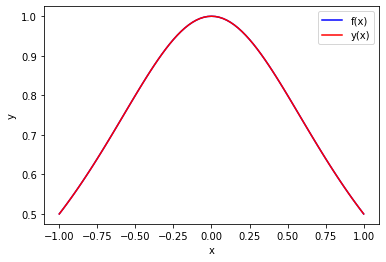

In [5]:
for n in [5,10,20]:
    print("n=",n)
    ra=np.linspace(-1,1,n+1)
    x=sp.symbols('x')
    y=Linterpolation(ra,f1,x)
    print("多项式表达式：",y)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])

    for i in range(0,evals.size):

        js = abs((result_L[i]-result_R[i])/result_R[i])
        print("x:",evals[i],"估计值:",result_L[i],"真实值:",result_R[i],"相对误差：",js)

    rx = np.linspace(-1, 1, 2*40 + 1)
    ry1 = np.array([f1(i) for i in rx])
    ry2 = np.array([y.evalf(subs={x:i}) for i in rx])
    plt.plot(rx, ry1, 'b-', label='f(x)')
    plt.plot(rx, ry2, 'r-', label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

### 拉格朗日插值区间越小越好吗？

(1)定义f2(x)
$$
f(x) =  e^x

$$

In [6]:
def f2(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return np.exp(x)

设置变量和验证数据列

In [7]:

evals = np.array([-4.75,-0.25,0.25,4.75])
# result_L=np.zeros(evals.size)
result_R=np.array([f2(i) for i in evals])

根据不同差值次数n得出结果

n= 5
多项式表达式： 0.0186801291026965*x**5 + 0.122638343247617*x**4 + 0.0837100150763059*x**3 - 0.160810762355857*x**2 + 1.0728110494648*x + 1.58125305392348
x: -4.75 估计值: 1.14703473149440 真实值: 0.008651695203120634 相对误差： 131.579188767615
x: -0.25 估计值: 1.30215246363921 真实值: 0.7788007830714049 相对误差： 0.671996859715306
x: 0.25 估计值: 1.84121041096990 真实值: 1.2840254166877414 相对误差： 0.433936109862579
x: 4.75 估计值: 119.621007056081 真实值: 115.58428452718766 相对误差： 0.0349244929395594


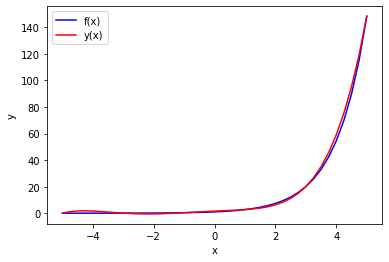

n= 10
多项式表达式： 4.16589702264156e-7*x**10 + 4.50740354171357e-6*x**9 + 2.20211913964803e-5*x**8 + 0.000163566907937791*x**7 + 0.00141017955506279*x**6 + 0.00860113550358025*x**5 + 0.0416073430658901*x**4 + 0.165919291540933*x**3 + 0.500040674413193*x**2 + 1.00051269228781*x + 1.0
x: -4.75 估计值: -0.00195655046054997 真实值: 0.008651695203120634 相对误差： 1.22614648512401
x: -0.25 估计值: 0.778686343904012 真实值: 0.7788007830714049 相对误差： 0.000146942799597422
x: 0.25 估计值: 1.28414448700240 真实值: 1.2840254166877414 相对误差： 9.27320542993811e-5
x: 4.75 估计值: 115.607360063059 真实值: 115.58428452718766 相对误差： 0.000199642503010236


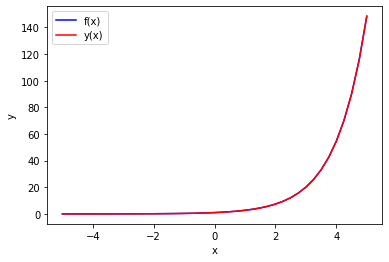

n= 20
多项式表达式： 5.06036221700607e-19*x**20 + 1.03305816238341e-17*x**19 + 1.52279752572525e-16*x**18 + 2.72434730523045e-15*x**17 + 4.78788316690679e-14*x**16 + 7.66631645071231e-13*x**15 + 1.14696519796008e-11*x**14 + 1.60565547074044e-10*x**13 + 2.08768259057198e-9*x**12 + 2.50522875234792e-8*x**11 + 2.7557314103604e-7*x**10 + 2.75573102075943e-6*x**9 + 2.48015873925438e-5*x**8 + 0.00019841270063755*x**7 + 0.00138888888875843*x**6 + 0.00833333333018501*x**5 + 0.0416666666668005*x**4 + 0.166666666668497*x**3 + 0.499999999999988*x**2 + 0.999999999999702*x + 1.0
x: -4.75 估计值: 0.00865178864605378 真实值: 0.008651695203120634 相对误差： 1.08005345712445e-5
x: -0.25 估计值: 0.778800783071453 真实值: 0.7788007830714049 相对误差： 6.22967352251250e-14
x: 0.25 估计值: 1.28402541668769 真实值: 1.2840254166877414 相对误差： 3.82172011945193e-14
x: 4.75 估计值: 115.584283686694 真实值: 115.58428452718766 相对误差： 7.27169381771223e-9


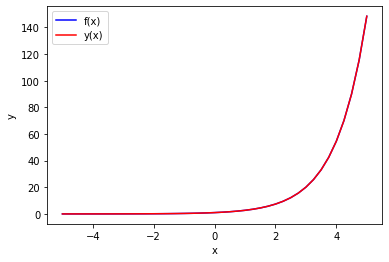

In [8]:
for n in [5,10,20]:
    print("n=",n)
    ra=np.linspace(-5,5,n+1)
    x=sp.symbols('x')
    y=Linterpolation(ra,f2,x)
    print("多项式表达式：",y)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])
    for i in range(0,evals.size):
        js = abs((result_L[i]-result_R[i])/result_R[i])
        print("x:",evals[i],"估计值:",result_L[i],"真实值:",result_R[i],"相对误差：",js)

    rx=np.linspace(-5,5,2*20+1)
    ry1 = np.array([f2(i) for i in rx])
    ry2 = np.array([y.evalf(subs={x:i}) for i in rx])
    plt.plot(rx, ry1, 'b-', label='f(x)')
    plt.plot(rx, ry2, 'r-', label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()